In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Chapter4_PE_Income_Spending_DataSet.csv')
df.describe()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)
count,200.000000,200.000000,200.000000
mean,38.850000,140.000000,47.690000
std,13.969007,60.717651,24.532346
min,18.000000,34.676354,0.950000
25%,28.750000,95.937913,33.012500
50%,36.000000,142.173052,47.500000
75%,49.000000,180.317041,69.350000
max,70.000000,316.710700,94.050000


In [5]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,1
1,21,34.676354,76.95,1
2,20,36.988111,5.70,0
3,23,36.988111,73.15,0
4,31,39.299868,38.00,0


<Axes: >

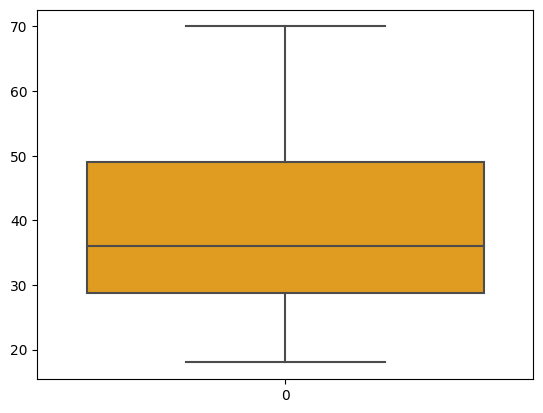

In [6]:
sns.boxplot(df['Petroleum_Engineer_Age'], color='orange')

<Axes: >

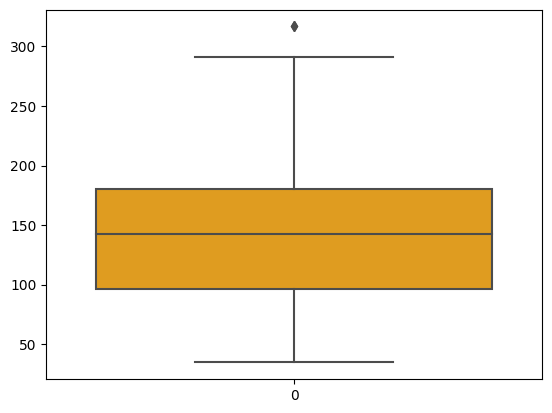

In [7]:
sns.boxplot(df['Petroleum_Engineer_Income (K$)'], color='orange')

<Axes: >

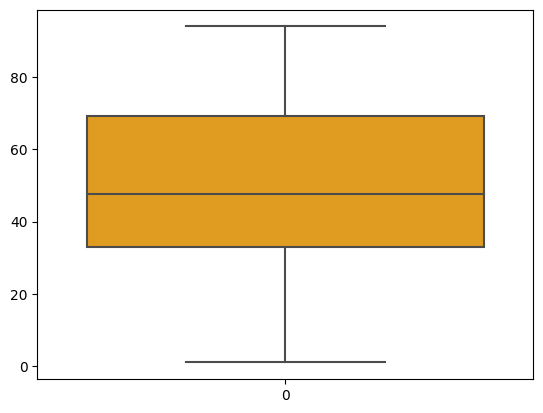

In [8]:
sns.boxplot(df['Spending_Habits (From 1 to 100)'], color='orange')

<Axes: >

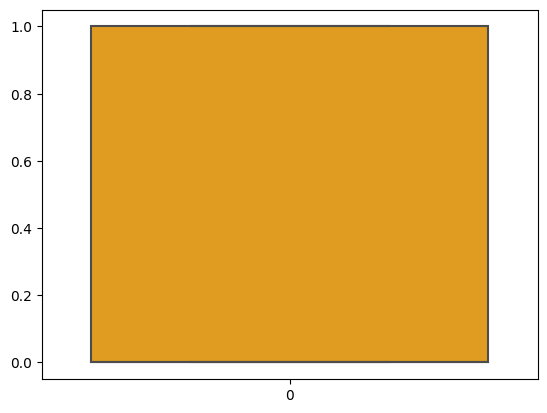

In [9]:
sns.boxplot(df['Petroleum_Engineer_Gender_Male'], color='orange')

In [10]:
df.columns

Index(['Petroleum_Engineer_Age', 'Petroleum_Engineer_Income (K$)',
       'Spending_Habits (From 1 to 100)', 'Petroleum_Engineer_Gender_Male'],
      dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
#df_scaled

In [15]:
df_scaled=pd.DataFrame(df_scaled, columns=['Petroleum_Engineer_Age', 'Petroleum_Engineer_Income (K$)',
       'Spending_Habits (From 1 to 100)', 'Petroleum_Engineer_Gender_Male'])
df_scaled.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [16]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=40, contamination=.1, metric='euclidean')
clf.fit(df_scaled)

LocalOutlierFactor(contamination=0.1, metric='euclidean', n_neighbors=40)

In [17]:
df_scaled.iloc[:,:4]

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


Text(0.5, 1.0, 'Histogram of Negative Outlier Factor')

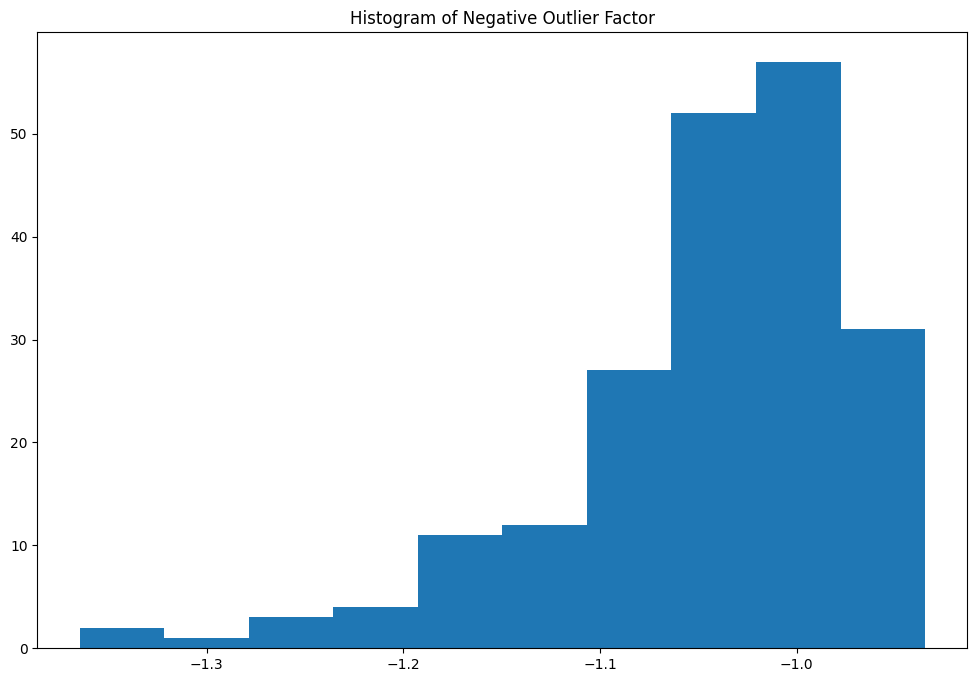

In [18]:
df_scaled['Scores']=clf.negative_outlier_factor_
plt.figure(figsize=(12,8))
plt.hist(df_scaled['Scores'])
plt.title('Histogram of Negative Outlier Factor')

In [20]:
df_scaled['Anomaly']=clf.fit_predict(df_scaled.iloc[:,:4])
Anomaly=df_scaled.loc[df_scaled['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
Anomaly.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores,Anomaly
2,-1.352802,-1.700830,-1.715913,-0.886405,-1.364613,-1
6,-0.276302,-1.624491,-1.715913,-0.886405,-1.260564,-1
7,-1.137502,-1.624491,1.700384,-0.886405,-1.196362,-1
8,1.804932,-1.586321,-1.832378,1.128152,-1.186293,-1
10,2.020232,-1.586321,-1.405340,1.128152,-1.154745,-1


Text(0.5, 1.0, 'Local Outlier Factor Anomalies')

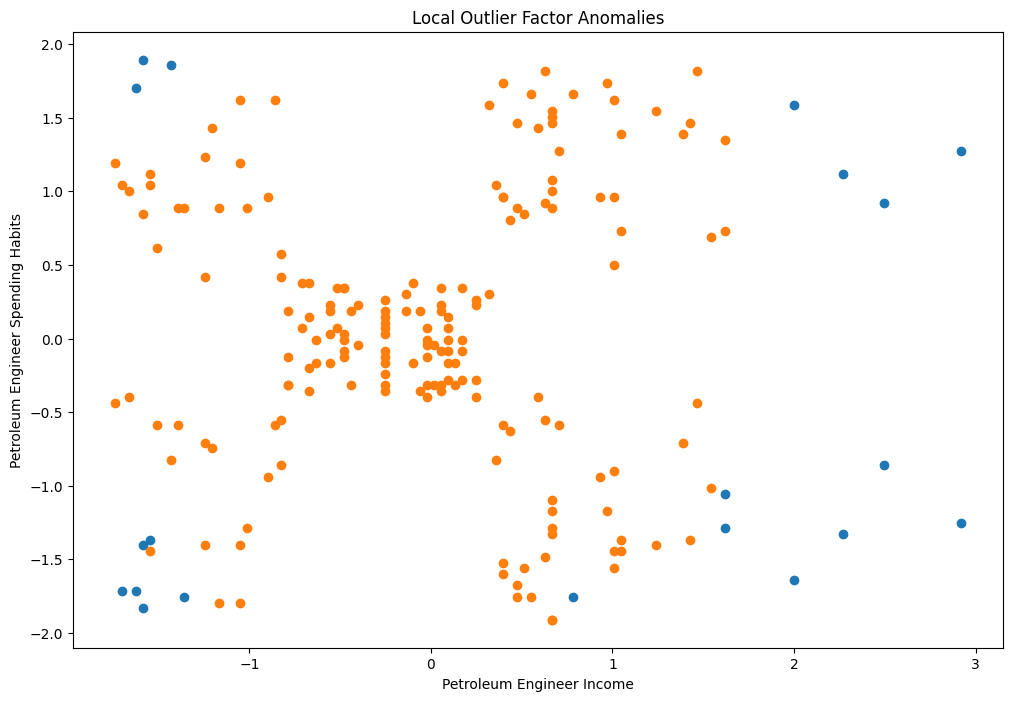

In [21]:
plt.figure(figsize=(12,8))
groups = df_scaled.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Local Outlier Factor Anomalies')